In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Loading the data into data frames

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipykernel_18/803896052.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


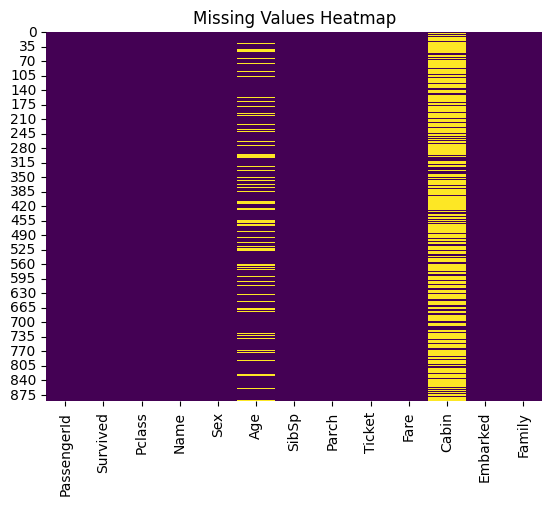

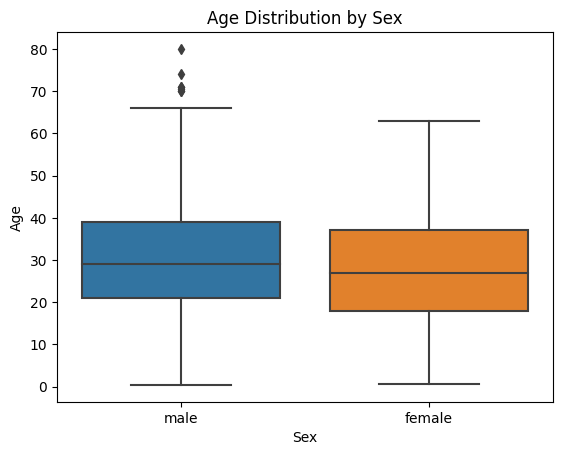

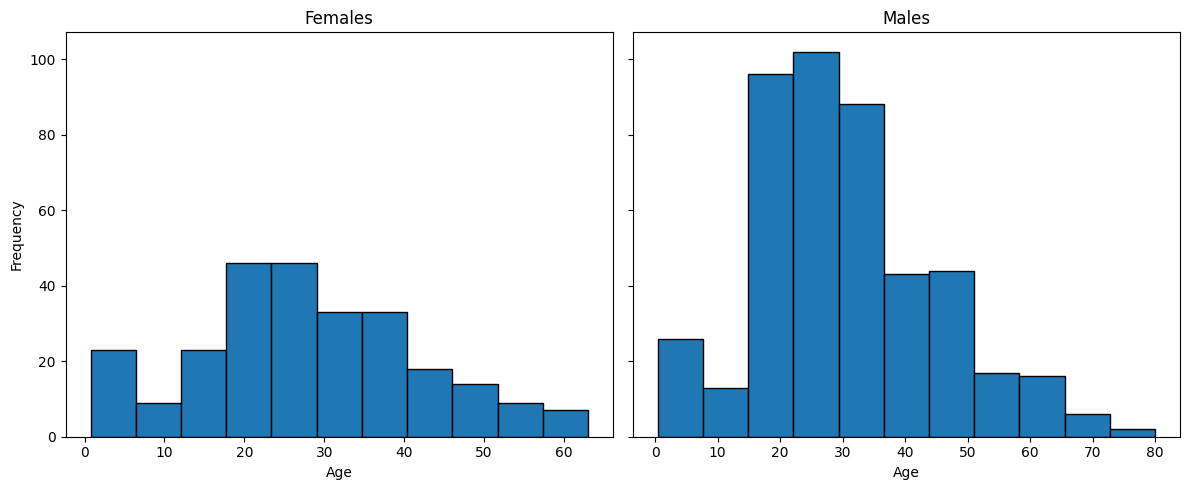

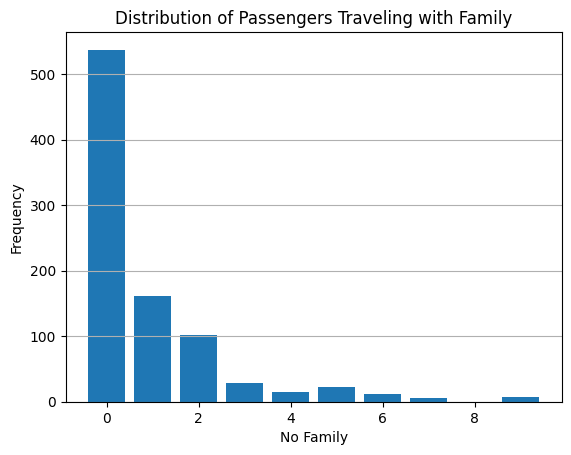

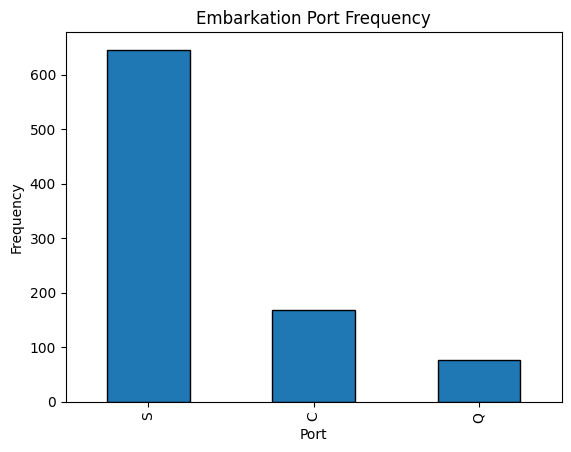

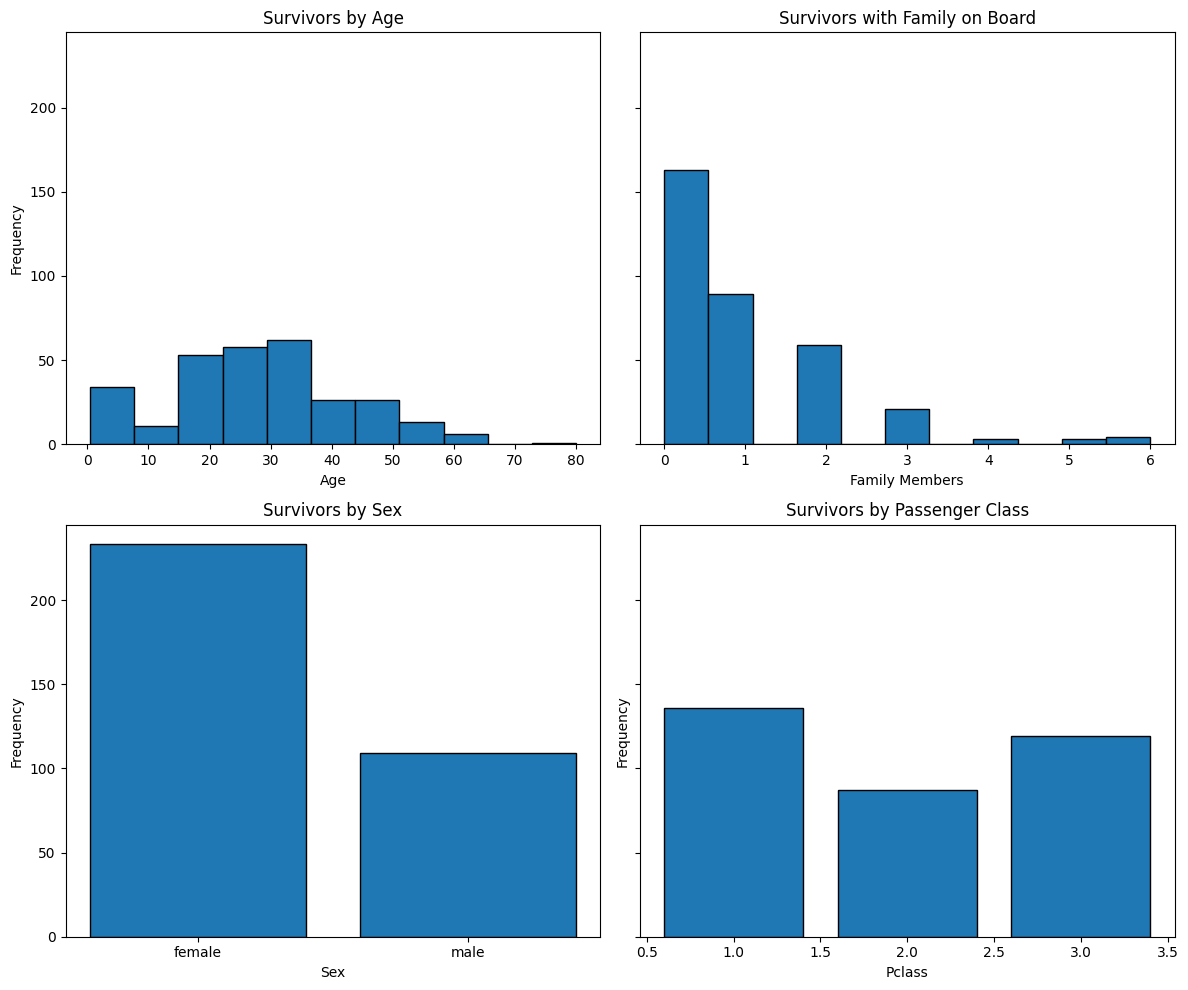

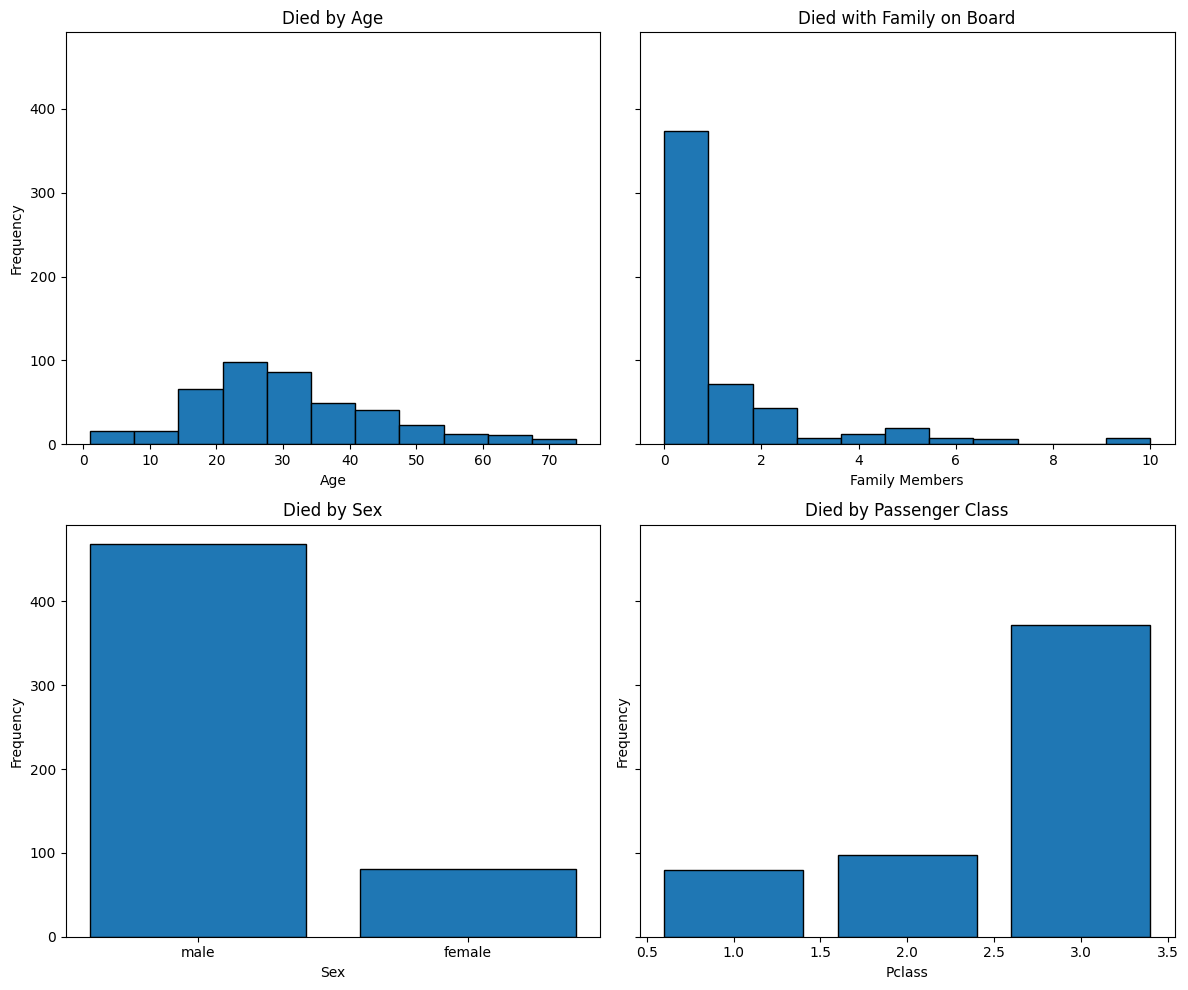

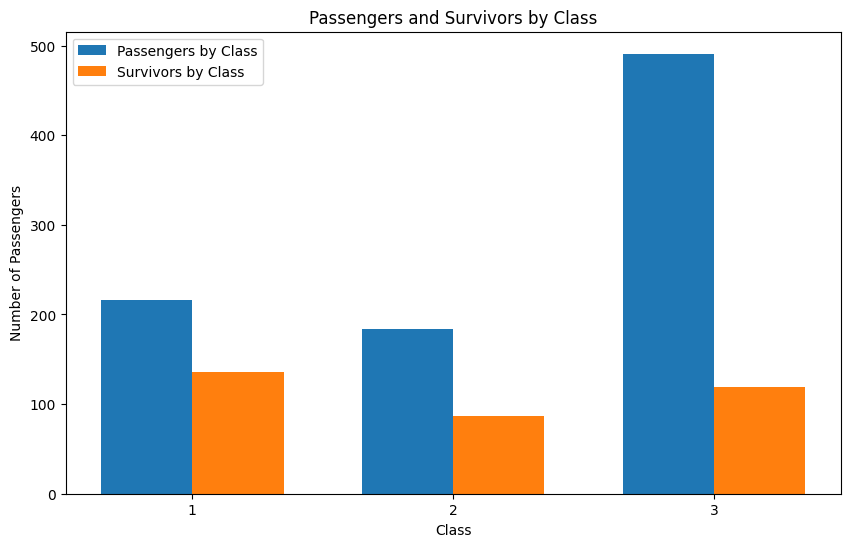

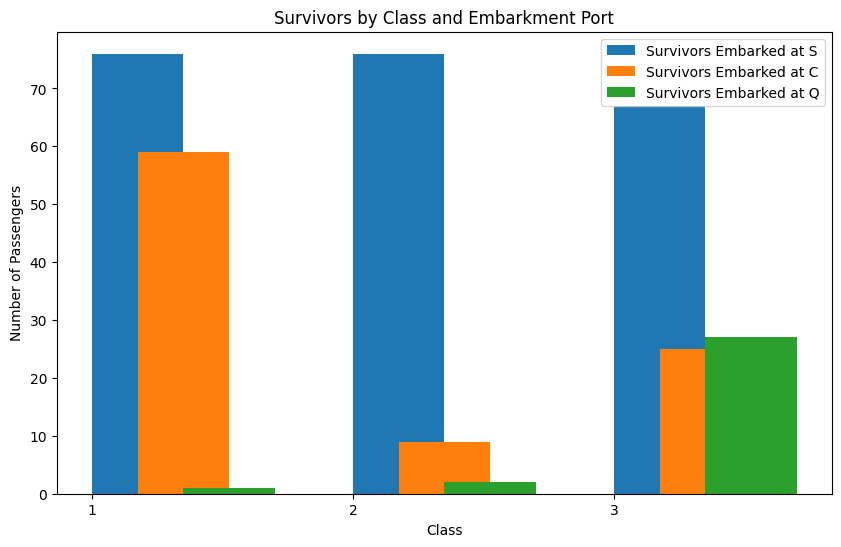

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Check for missing values
missing_values = train.isna().sum()
print(missing_values)

# Fill missing 'Embarked' with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Create new 'Family' feature
train['Family'] = train['Parch'] + train['SibSp']

# Visualize missing values
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Visualize Age distribution by Sex
sns.boxplot(x='Sex', y='Age', data=train)
plt.title('Age Distribution by Sex')
plt.show()

# Histograms for Age distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].hist(train[train['Sex'] == 'female']['Age'].dropna(), bins=11, edgecolor='black')
axes[0].set_title('Females')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

axes[1].hist(train[train['Sex'] == 'male']['Age'].dropna(), bins=11, edgecolor='black')
axes[1].set_title('Males')
axes[1].set_xlabel('Age')
plt.tight_layout()
plt.show()

# Family distribution
plt.hist(train['Family'], bins=10, align='left', rwidth=0.8)
plt.xlabel('No Family')
plt.ylabel('Frequency')
plt.title('Distribution of Passengers Traveling with Family')
plt.grid(axis='y')
plt.show()

# Embarkation port frequency
train['Embarked'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Port')
plt.ylabel('Frequency')
plt.title('Embarkation Port Frequency')
plt.show()

# Visualize survivors
survivors = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Survivors by Age
axes[0, 0].hist(survivors['Age'].dropna(), bins=11, edgecolor='black')
axes[0, 0].set_title('Survivors by Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Survivors with Family on board
axes[0, 1].hist(survivors['Family'].dropna(), bins=11, edgecolor='black')
axes[0, 1].set_title('Survivors with Family on Board')
axes[0, 1].set_xlabel('Family Members')

# Survivors by Sex
survivors_sex_counts = survivors['Sex'].value_counts()
axes[1, 0].bar(survivors_sex_counts.index, survivors_sex_counts.values, edgecolor='black')
axes[1, 0].set_title('Survivors by Sex')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Frequency')

# Survivors by Pclass
survivors_pclass_counts = survivors['Pclass'].value_counts()
axes[1, 1].bar(survivors_pclass_counts.index, survivors_pclass_counts.values, edgecolor='black')
axes[1, 1].set_title('Survivors by Passenger Class')
axes[1, 1].set_xlabel('Pclass')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Died by Age, Family, Sex, Pclass
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Died by Age
axes[0, 0].hist(died['Age'].dropna(), bins=11, edgecolor='black')
axes[0, 0].set_title('Died by Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Died with Family on Board
axes[0, 1].hist(died['Family'].dropna(), bins=11, edgecolor='black')
axes[0, 1].set_title('Died with Family on Board')
axes[0, 1].set_xlabel('Family Members')

# Died by Sex
died_sex_counts = died['Sex'].value_counts()
axes[1, 0].bar(died_sex_counts.index, died_sex_counts.values, edgecolor='black')
axes[1, 0].set_title('Died by Sex')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Frequency')

# Died by Pclass
died_pclass_counts = died['Pclass'].value_counts()
axes[1, 1].bar(died_pclass_counts.index, died_pclass_counts.values, edgecolor='black')
axes[1, 1].set_title('Died by Passenger Class')
axes[1, 1].set_xlabel('Pclass')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Passengers and Survivors by Class
classes = train['Pclass'].value_counts().sort_index().index
bar_width = 0.35
x = np.arange(len(classes))

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width/2, train['Pclass'].value_counts().sort_index(), bar_width, label='Passengers by Class')
bars2 = ax.bar(x + bar_width/2, survivors['Pclass'].value_counts().sort_index(), bar_width, label='Survivors by Class')

ax.set_xlabel('Class')
ax.set_ylabel('Number of Passengers')
ax.set_title('Passengers and Survivors by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()

# Passengers and Survivors by Embarkment Port
embarked_ports = ['S', 'C', 'Q']
fig, ax = plt.subplots(figsize=(10, 6))

for port in embarked_ports:
    survivors_port = survivors[survivors['Embarked'] == port]['Pclass'].value_counts().sort_index()
    ax.bar(x + bar_width/2 * (embarked_ports.index(port) + 1), survivors_port, bar_width, label=f'Survivors Embarked at {port}')

ax.set_xlabel('Class')
ax.set_ylabel('Number of Passengers')
ax.set_title('Survivors by Class and Embarkment Port')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()


Looking at the data can observe:

- Most passengers boarded the ship on port C
- The number of female passengers was significantly lower than males
- Most of the survivors by large were first and second class females
- When comparing between Pclass the proportion of first and second class passengers that survived is significantly larger than for third class passengers
- Most of passengers were travelling alone with no family.

Since there were only two values missing from the 'Embarked' column we replaced it by 'S' the most commont embarkement port. 

Before continuing with model building we'll take a look at the correlation between the variables

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
PassId=test['PassengerId'].values



def transform_data(df_train, df_test):
    # Replace NaN values in 'Embarked' with 'S'
    #df_train['Embarked'].fillna('S', inplace=True)
    #df_test['Embarked'].fillna('S', inplace=True)
       
    # Replace 'female' with 1 and 'male' with 0 in the 'Sex' column
    df_train['Sex'] = df_train['Sex'].map({'female': 1, 'male': 0})
    df_test['Sex'] = df_test['Sex'].map({'female': 1, 'male': 0})
    
    # Create a new 'Family' column
    df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
    df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1
    
    # Fill NaN 'Age' values with random values following the existing distribution
    age_mean_train = df_train['Age'].mean()
    age_std_train = df_train['Age'].std()
    age_null_count_train = df_train['Age'].isnull().sum()
    age_fill_values_train = np.random.randint(age_mean_train - age_std_train, age_mean_train + age_std_train, size=age_null_count_train)
    df_train.loc[np.isnan(df_train['Age']), 'Age'] = age_fill_values_train
    
    age_mean_test = df_test['Age'].mean()
    age_std_test = df_test['Age'].std()
    age_null_count_test = df_test['Age'].isnull().sum()
    age_fill_values_test = np.random.randint(age_mean_test - age_std_test, age_mean_test + age_std_test, size=age_null_count_test)
    df_test.loc[np.isnan(df_test['Age']), 'Age'] = age_fill_values_test
    
    # Create bins for ages
    bins = [0, 12, 21, 39, 60, np.inf]
    labels = ['child', 'teen', 'young_adult', 'adult', 'elder']
    df_train['AgeBin'] = pd.cut(df_train['Age'], bins=bins, labels=labels)
    df_test['AgeBin'] = pd.cut(df_test['Age'], bins=bins, labels=labels)
    
    # Dummify the 'AgeBin' variable
    age_dummies_train = pd.get_dummies(df_train['AgeBin'], prefix='Age', drop_first=False)
    age_dummies_test = pd.get_dummies(df_test['AgeBin'], prefix='Age', drop_first=False)
    df_train = pd.concat([df_train, age_dummies_train], axis=1)
    df_test = pd.concat([df_test, age_dummies_test], axis=1)
    
    # Extract titles from 'Name' and create a new 'Title' column
    #df_train['Title'] = df_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    #df_test['Title'] = df_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

    # Create a new 'Title_type' column
    #df_train['Title_type'] = df_train['Title'].apply(lambda x: 'regular' if x in ['Mr', 'Mrs', 'Miss', 'Ms','Master'] else 'special')
    #df_test['Title_type'] = df_test['Title'].apply(lambda x: 'regular' if x in ['Mr', 'Mrs', 'Miss', 'Ms','Master'] else 'special')
    
    # Dummify the 'Title_type' variable
    #title_type_dummies_train = pd.get_dummies(df_train['Title_type'], prefix='Title_type')
    #title_type_dummies_test = pd.get_dummies(df_test['Title_type'], prefix='Title_type')
    #df_train = pd.concat([df_train, title_type_dummies_train], axis=1)
    #df_test = pd.concat([df_test, title_type_dummies_test], axis=1)
    
    # Create dummy variables for 'Pclass'
    pclass_dummies_train = pd.get_dummies(df_train['Pclass'], prefix='Pclass', drop_first=False)
    pclass_dummies_test = pd.get_dummies(df_test['Pclass'], prefix='Pclass', drop_first=False)
    df_train = pd.concat([df_train, pclass_dummies_train], axis=1)
    df_test = pd.concat([df_test, pclass_dummies_test], axis=1)
    
    # Create dummy variables for 'Embarked'
    #embarked_dummies_train = pd.get_dummies(df_train['Embarked'], prefix='Embarked', drop_first=False)
    #embarked_dummies_test = pd.get_dummies(df_test['Embarked'], prefix='Embarked', drop_first=False)
    #df_train = pd.concat([df_train, embarked_dummies_train], axis=1)
    #df_test = pd.concat([df_test, embarked_dummies_test], axis=1)
    
    # Eliminate not useful columns
    df_train.drop(columns=['PassengerId','Pclass', 'Name','Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeBin',
       ], inplace=True)
    df_test.drop(columns=['PassengerId', 'Pclass', 'Name','Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeBin',
       ], inplace=True)
    
    # Ensure boolean values are transformed to 0s and 1s
    bool_cols_train = ['Sex'] + [col for col in df_train.columns if col.startswith('Age_') or col.startswith('Pclass_') or col.startswith('Embarked_') or col.startswith('Title_type_')]
    bool_cols_test = ['Sex'] + [col for col in df_test.columns if col.startswith('Age_') or col.startswith('Pclass_') or col.startswith('Embarked_') or col.startswith('Title_type_')]
    df_train[bool_cols_train] = df_train[bool_cols_train].astype(int)
    df_test[bool_cols_test] = df_test[bool_cols_test].astype(int)
    
    return df_train, df_test

# Transform the training and test datasets
train_transformed, test_transformed = transform_data(train, test)

print(train_transformed.head())
print(test_transformed.head())



   Survived  Sex  Family  Age_child  Age_teen  Age_young_adult  Age_adult  \
0         0    0       2          0         0                1          0   
1         1    1       2          0         0                1          0   
2         1    1       1          0         0                1          0   
3         1    1       2          0         0                1          0   
4         0    0       1          0         0                1          0   

   Age_elder  Pclass_1  Pclass_2  Pclass_3  
0          0         0         0         1  
1          0         1         0         0  
2          0         0         0         1  
3          0         1         0         0  
4          0         0         0         1  
   Sex  Family  Age_child  Age_teen  Age_young_adult  Age_adult  Age_elder  \
0    0       1          0         0                1          0          0   
1    1       2          0         0                0          1          0   
2    0       1          0        

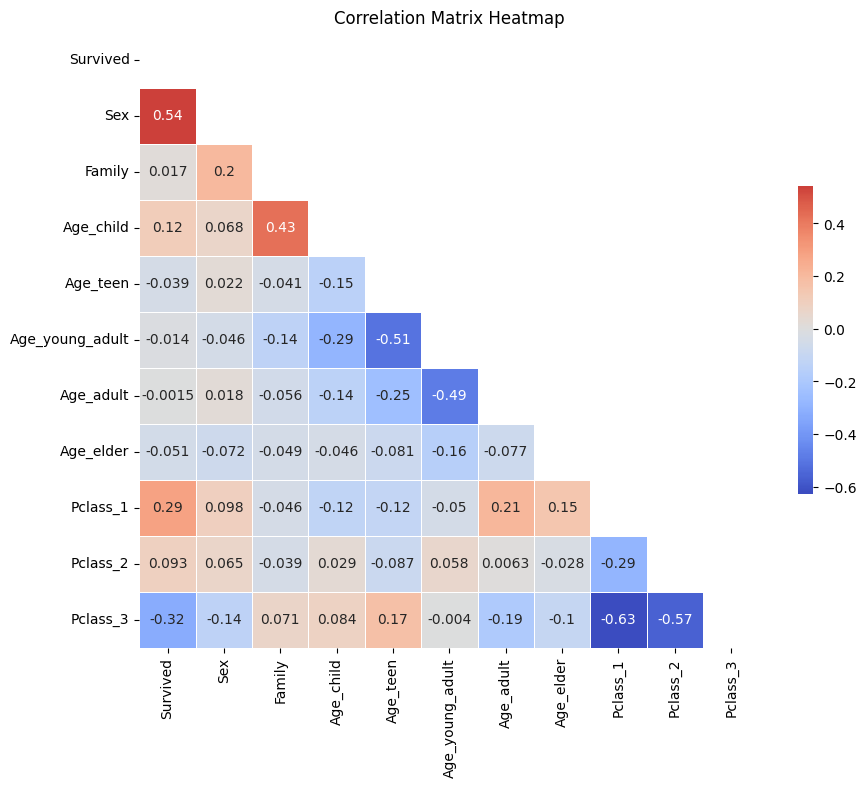

In [4]:
correlation_matrix = train_transformed.corr()

# Create a mask for the upper triangle for a clearer visual
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, linewidths=0.5, cbar_kws={"shrink": .5})


plt.title('Correlation Matrix Heatmap')
plt.show()

The variables most highly correlated with survival probability are 'sex' and 'Pclass.'



In [5]:
# Definning test split size and test for easier adjustment 
size=0.12
state=42

In [6]:
# Import all necessary libraries

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [7]:
features = train_transformed.drop('Survived', axis=1).values
labels = train_transformed.Survived.values


X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=size,
                                                    random_state=state)


# Logistic Regression

In [8]:
# Define the logistic regression model
logistic_model = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300]  # Maximum number of iterations
 }

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found:  {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best cross-validation score:  0.8061244487996081
Test set accuracy:  0.8411214953271028


# Random Forest

In [9]:
# Define the Random Forest model
random_forest_model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score:  0.8252572268495836
Test set accuracy:  0.8411214953271028


# Support Vector Machine

In [10]:
# Define the Support Vector Machine model
svm_model = SVC(probability=True)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the model on the test data
best_model_svm= grid_search.best_estimator_
y_pred = best_model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)


Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score:  0.8252653927813164
Test set accuracy:  0.8411214953271028


# Gradient Boosted Trees

In [11]:
# Define the Gradient Boosted Trees model
gbt_model = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gbt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the model on the test data
best_model_gbt = grid_search.best_estimator_
y_pred = best_model_gbt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation score:  0.8303609341825903
Test set accuracy:  0.8598130841121495


# Extreme Gradient Boosting

In [12]:
# Define the XGBoost model
xgb_model = XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.3]  # Learning rate
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score:  0.8290870488322717
Test set accuracy:  0.8598130841121495


In [13]:
# Define the voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('gbt', gbt_model),
        ('rf', random_forest_model),
        ('svm', svm_model),
        ('lr', logistic_model),
        ('xgb', xgb_model)  # Include XGBoost model in the ensemble
    ],
    voting='soft'  # 'hard' voting means a majority vote is used
)

# Fit the voting classifier to the training data
voting_classifier.fit(X_train, y_train)

# Evaluate the voting classifier on the test data
y_pred = voting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy (Voting Classifier): ", accuracy)

Test set accuracy (Voting Classifier):  0.8598130841121495


# We will use the best accuracy result to predict the values 

In [14]:
Features_sub=test_transformed.values
y_sub = voting_classifier.predict(Features_sub)
print(y_sub)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [15]:
submission = pd.DataFrame({
    'PassengerId': PassId,
    'Survived': y_sub
})
print(len(submission))
submission.to_csv('titanic_result.csv',index=False)

418


In [16]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
